## Mahmoud MOhamamdi (800-8683389-mmoham12)
## ITSC 5010- Project

## TensorFlow Regression

### Data Set : 
### Address :
    
### Feature Columns:            


### Label Column 
 

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

from sklearn import datasets
from sklearn.datasets.mldata import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.datasets import load_boston

import datetime

import tempfile

import matplotlib.pyplot as plt
%matplotlib inline


import time
import numpy as np
import pandas as pd

In [2]:
class RegressionModel(object):
    def __init__(self, sess, dataset_name, epoch,batch_size,learning_rate, scope ='Regression'):

        self.dataset = dataset_name  
        self.scope= scope        
        self.epoch = epoch
        self.batch_size = batch_size        
        self.learning_rate= learning_rate
        
        self.sess = sess
        
        self.y_pred =0.0
        
        self.cost_history= np.empty(shape=[1],dtype=float)
        
        # Partitioning the dataset  
        features , labels  = self.load_dataset(dataset_name)
        
        self.num_dim = features.shape[1]
        
        
        print(" Data: %s ,  Labels: %s  " %(features.shape , labels.shape  ))
        
        self.X_train, self.X_test, self.y_train, self.y_test \
            = train_test_split( features , labels, test_size = 0.2)
                
        self.build_model()
       
            #iris['data'] , iris['target'].reshape((-1,1)),test_size = 0.3)

    def normalize_data(self, data):
    
        '''
        Normalizing the Input Data in range of -1,1

        '''

        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1 ,1))

        min_max_scaler.fit(data)

        normalized_data = min_max_scaler.transform(data)


        return normalized_data

    def load_dataset(self, dataset_name):
             
        
        boston = load_boston()
        features = np.array(boston.data)
        
        labels = np.array(boston.target).reshape((-1,1))        
        
        
        features = self.normalize_data(features) 
        
        
        # Adding one column to features ( to cover interception)
        
        features = np.hstack( ( np.ones((features.shape[0],1)), features))        

        
        return features ,labels
        
      

    def build_model(self):
        
        with tf.name_scope(self.scope) :

            
            
            self.X = tf.placeholder( tf.float32 ,shape= [None] +[self.num_dim], name="X")
            self.y = tf.placeholder(tf.float32 ,shape=[None]+[1]  , name="y")
            
            # Trainbale Weights          
            
            self.W = tf.Variable(np.ones([self.num_dim,1]), dtype = tf.float32) 
            
            self.y_pred = tf.matmul(self.X, self.W)             
            
            #print( self.y_pred.get_shape().as_list())
            
            # Cost = Mean Squar Error
            self.cost = tf.reduce_mean( tf.square( self.y_pred - self.y)) 
            
            #print( self.cost.get_shape().as_list())
           
            self.saver = tf.train.Saver()
                    

    def train(self):
        print("Start Training...\n")
        
        optimizer = tf.train.GradientDescentOptimizer(self.learning_rate).minimize(self.cost)
        
               
        tf.global_variables_initializer().run(session= self.sess)
         
        #self.batch_size = len(self.X_train)
         
        num_batches = len(self.X_train) // self.batch_size 
        
                
        start_time = time.time()
        
        train_show = 50
        
        for epoch in range(self.epoch):
            
            #print("Epoch Index"+ epoch)
            
            for idx in range(num_batches):
                
                #print("Batch Index"+ idx)
                
                batch_data = self.X_train[idx *  self.batch_size: (idx+1) *  self.batch_size] 
                batch_labels= self.y_train[idx *  self.batch_size: (idx+1) *  self.batch_size] 
                
                #print("Batch Data %s , Batch Label %s" %(batch_data.shape , batch_labels.shape))
                
                with self.sess.as_default():
                    
                    self.sess.run([optimizer],
                        feed_dict={self.X: batch_data, 
                                   self.y: batch_labels  
                                  })
            
            if (epoch+1) % train_show == 0:

                cost = tfobj.cost.eval(session= sess, feed_dict= {tfobj.X: tfobj.X_train , tfobj.y: tfobj.y_train})
                

                print ("Epoch:[%02d], Batch :[%2d / %3d],cost= %.4f " % ( epoch+1 ,idx+1,\
                     num_batches,cost))

                            

In [3]:
#def main():
    
with tf.Session() as sess:
        tfobj = RegressionModel(
            sess,
            dataset_name ='boston',            
            epoch = 200,                      
            batch_size= 50, 
            learning_rate = 0.01
            )
        
tfobj.train()

print("\n End Of Training: \n")

cost = tfobj.cost.eval(session= sess, feed_dict= {tfobj.X: tfobj.X_train , tfobj.y: tfobj.y_train})

print("Cost= %.4f \n W= %s  \n" % (cost , np.array2string(sess.run(tfobj.W)) ) )


 Data: (506, 14) ,  Labels: (506, 1)  
Start Training...

Epoch:[50], Batch :[ 8 /   8],cost= 25.6737 
Epoch:[100], Batch :[ 8 /   8],cost= 22.3007 
Epoch:[150], Batch :[ 8 /   8],cost= 21.6315 
Epoch:[200], Batch :[ 8 /   8],cost= 21.3526 

 End Of Training: 

Cost= 21.3526 
 W= [[ 9.316576  ]
 [-6.21813583]
 [ 1.78355646]
 [-0.90659732]
 [ 0.65030921]
 [-3.7535491 ]
 [ 9.56838703]
 [ 0.60364878]
 [-7.03797007]
 [ 2.78756046]
 [-1.85163546]
 [-4.6906743 ]
 [ 2.0274725 ]
 [-9.4562645 ]]  



### Quality of Predictions
### Scatter plot shows proportion of Predicted vs. Real values based on the test data-set. In a prefect prediction all dots are placed on the linear line.

Error(MSE) = 26.2841 



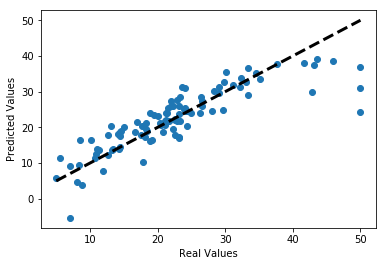

In [4]:
pred_y = sess.run(tfobj.y_pred, feed_dict={tfobj.X: tfobj.X_test})

error = np.mean( np.square ( pred_y - tfobj.y_test))

print("Error(MSE) = %.4f \n" % (error))

fig, ax = plt.subplots()
ax.scatter(tfobj.y_test, pred_y)

ax.plot([tfobj.y_test.min(), tfobj.y_test.max()], [tfobj.y_test.min(), tfobj.y_test.max()], 'k--', lw=3)
ax.set_xlabel('Real Values')
ax.set_ylabel('Predicted Values')
plt.show()